In [6]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [9]:
df=pd.read_csv('data\stud.csv')
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
x=df.drop(columns=['math_score'],axis=1)

In [12]:
y=df['math_score']

In [13]:
#creating column transformer
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [15]:
x=preprocessor.fit_transform(x)

In [24]:
#seperate datset
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain.shape,ytrain.shape

((800, 19), (800,))

In [26]:
#creaing an evalution function to give all metrices of model
def evaluation_function(y_true, y_pred):
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rms=np.sqrt(mean_squared_error(y_true,y_pred))
    r2_square=r2_score(y_true,y_pred)
    return mae,rms,r2_square

In [27]:
models = {
    "LinearRegression" :LinearRegression(),
    "DecisionTreeRegressor" :DecisionTreeRegressor(),
    "RandomForestRegressor" :RandomForestRegressor(),
    "Lasso" :Lasso(),
    "Ridge" :Ridge(),
    "KNeighborsRegressor" :KNeighborsRegressor(),
    "XGBRegressor" :XGBRegressor(),
    "CatBoostRegressor" :CatBoostRegressor(),
    "AdaBoostRegressor" :AdaBoostRegressor()

}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(xtrain,ytrain)

    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    model_train_mae , model_train_rmse, model_train_r2 = evaluation_function(ytrain,y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluation_function(ytest,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3269
- Mean Absolute Error: 4.2782
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4108
- Mean Absolute Error: 4.2279
- R2 Score: 0.8797


DecisionTreeRegressor
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.9025
- Mean Absolute Error: 6.3000
- R2 Score: 0.7434


RandomForestRegressor
Model performance for Training set
- Root Mean Squared Error: 2.2830
- Mean Absolute Error: 1.8125
- R2 Score: 0.9769
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0113
- Mean Absolute Error: 4.7066
- R2 Score: 0.8515


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
--------

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Ridge,0.880593
0,LinearRegression,0.879689
7,CatBoostRegressor,0.851632
2,RandomForestRegressor,0.851501
8,AdaBoostRegressor,0.845048
6,XGBRegressor,0.827797
3,Lasso,0.825320
5,KNeighborsRegressor,0.783898
1,DecisionTreeRegressor,0.743362


In [33]:
# choosing linear regression model
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(xtrain,ytrain)
y_pred = lin_model.predict(xtest)
score = r2_score(ytest,y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.97


Text(0, 0.5, 'Predicted')

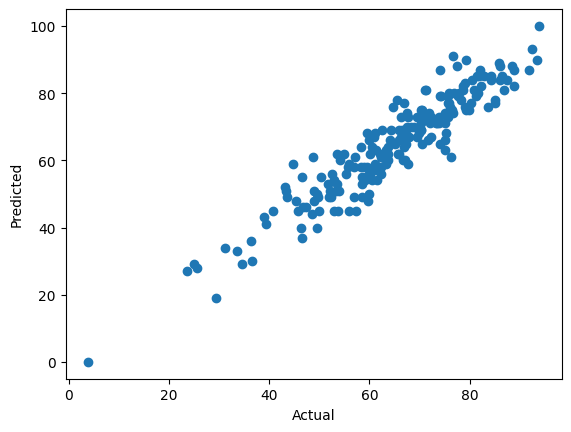

In [34]:
plt.scatter(y_pred,ytest)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

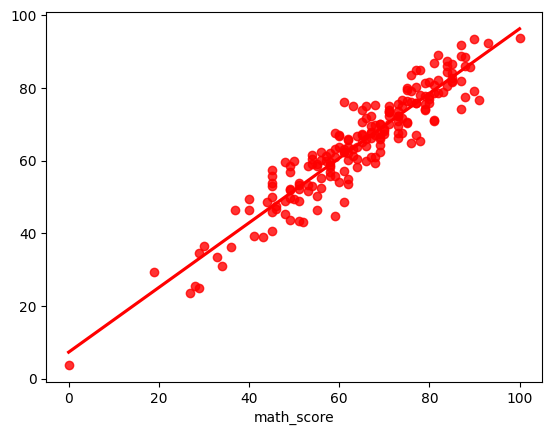

In [36]:
sns.regplot(x=ytest,y=y_pred,ci=None,color ='red')

In [43]:
ridge_model=Ridge(fit_intercept=True)
ridge_model= ridge_model.fit(xtrain,ytrain)
y_pred = ridge_model.predict(xtest)
score = r2_score(ytest,y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.06


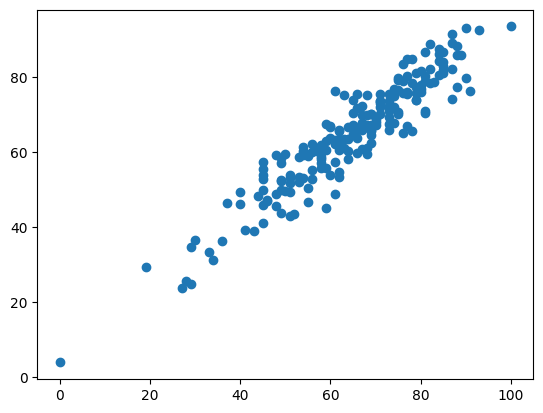

In [44]:
plt.scatter(ytest,y_pred)
plt.show()

<Axes: xlabel='math_score'>

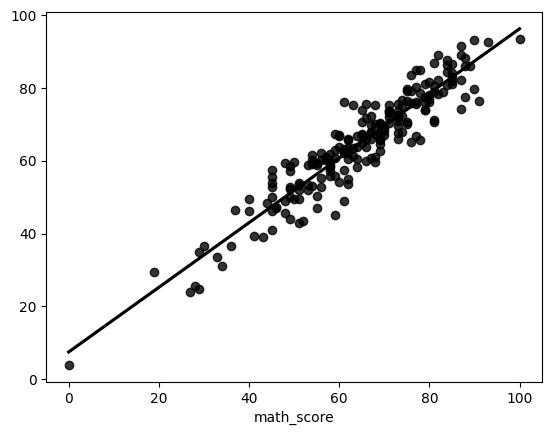

In [45]:
sns.regplot(x=ytest,y=y_pred,ci=None,color='Black')


In [38]:
pred_df=pd.DataFrame({'Actual Value' : ytest ,'Predicted Value': y_pred ,'Difference': ytest-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
521,91,76.734375,14.265625
737,53,58.593750,-5.593750
740,80,76.843750,3.156250
660,74,76.750000,-2.750000
411,84,87.500000,-3.500000
...,...,...,...
408,52,43.156250,8.843750
332,62,62.125000,-0.125000
208,74,67.578125,6.421875
613,65,67.343750,-2.343750
